In [14]:
import pandas as pd
df = pd.read_csv('../z20_data/chipotle.tsv',sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [15]:
# 기초 데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [39]:
df.head()
df['choice_description'].fillna('',inplace=True)
df.head(10)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_5924\3193268344.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['choice_description'].fillna('',inplace=True)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [16]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [21]:
df.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [47]:
df['order_id']=df['order_id'].astype(int)

In [70]:
# 주문당 평균 계산 금액
# df['item_price'] = df['item_price'].str.replace('$','').astype(float)
df1 = df.groupby('order_id').sum()[['quantity','item_price']]
df1.sort_values('item_price',ascending=False)


,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
17,2,10.08
889,2,10.08
1014,2,10.08


In [65]:
df1[df1['item_price']>=10]

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [90]:
df.groupby('item_name')['quantity'].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [96]:
#item 당 주문개수
df.groupby('item_name')['order_id'].count().head()

# df.groupby('item_name').value_counts()

# df['item_name'].count()

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Name: order_id, dtype: int64

<BarContainer object of 5 artists>

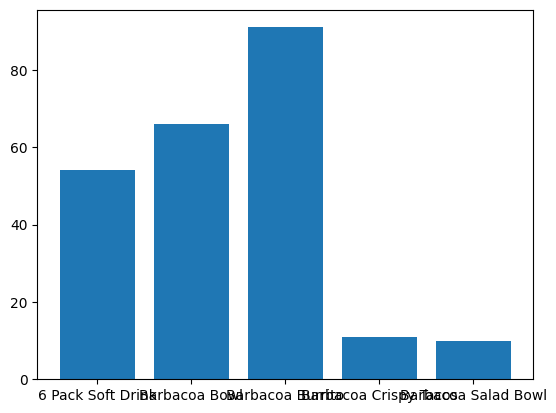

In [103]:
x= df.groupby('item_name')['order_id'].count().head().index
y= df.groupby('item_name')['order_id'].count().head().values
# x
import matplotlib.pyplot as plt
plt.bar(x,y)

In [158]:
# df[df['item_name'] == '6 Pack Soft Drink']
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [137]:
# 각 아이템의 가격 구하시오.
# 주문이 1개이면서, item_name 최저가격인 것을 출력하시오.
menu_1 = df[df['quantity']==1][['item_name','item_price']].groupby('item_name').min()
menu_1.sort_values('item_price',ascending=False)


,item_price
item_name,
Steak Salad Bowl,9.39
Barbacoa Salad Bowl,9.39
Carnitas Salad Bowl,9.39
Carnitas Soft Tacos,8.99
Carnitas Crispy Tacos,8.99
Steak Soft Tacos,8.99
Carnitas Salad,8.99
Carnitas Bowl,8.99
Barbacoa Soft Tacos,8.99


In [128]:
menu_1

In [173]:
# 가장 비싼 주문에서 item이 총 몇개 팔렸는지?

# df.loc[df['item_price'].idxmax()]
# df['item_price'].max()
# df.loc[3598]
df.loc[df['item_price'].idxmax()]

df.groupby('order_id')[['item_name','item_price']].sum().sort_values('item_price')

,item_name,item_price
order_id,,
113,Steak BowlCanned Soda,10.08
1122,Steak BurritoCanned Soda,10.08
100,Steak BurritoCanned Soda,10.08
1494,Steak BurritoCanned Soda,10.08
1475,Steak BurritoCanned Soda,10.08
...,...,...
1786,Chicken BowlCarnitas BurritoChicken BowlChicke...,114.30
691,Chicken BurritoChicken Salad BowlSteak Burrito...,118.25
1483,Chicken BowlSteak BowlChicken BurritoSteak Bow...,139.00


In [160]:
df[df['item_name']=='Chips and Fresh Tomato Salsa'].head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,2.39
25,13,1,Chips and Fresh Tomato Salsa,,2.39
55,25,1,Chips and Fresh Tomato Salsa,,2.39
89,39,1,Chips and Fresh Tomato Salsa,,2.95
183,82,1,Chips and Fresh Tomato Salsa,,2.95
194,86,1,Chips and Fresh Tomato Salsa,,2.95
240,104,1,Chips and Fresh Tomato Salsa,,2.95
265,115,1,Chips and Fresh Tomato Salsa,,2.39
267,116,1,Chips and Fresh Tomato Salsa,,2.95
302,131,1,Chips and Fresh Tomato Salsa,,2.39


In [183]:
## 치킨 보울 한 주문에 2개이상 주문한 횟수가 몇 번인지

a = df[df['item_name']=='Chicken Bowl']
a[a['quantity']>=2].count()
a[a['quantity']>=2]

# df['item_name']=='Chicken Bowl'

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
654,271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
976,401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1017,418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",17.50
1106,457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50
